In [1]:
!pip install --upgrade transformers --quiet


In [2]:
!pip install --upgrade datasets fsspec


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12

In [3]:
pip install transformers datasets scikit-learn torch pandas numpy tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [4]:
pip install datasets

# **IMPORTING LIBRARIES**

In [5]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
from sklearn.metrics import accuracy_score, f1_score, hamming_loss


# **LOADING DATASET**

In [6]:
from datasets import load_dataset
dataset = load_dataset("go_emotions")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.77M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/350k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

# **INSPECTING DATASET**

In [7]:
print(dataset['train'][0])  # Inspect a sample from the training data


{'text': "My favourite food is anything I didn't have to cook myself.", 'labels': [27], 'id': 'eebbqej'}


# **TEXT PREPROCESSING**

In [8]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def preprocess(examples):
    # Tokenize
    encoding = tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

    # Multi-hot encode the labels
    num_labels = 28
    multi_hot_labels = []
    for label_list in examples["labels"]:
        vec = [0.0] * num_labels
        for label in label_list:
            vec[label] = 1.0
        multi_hot_labels.append(vec)

    encoding["labels"] = multi_hot_labels
    return encoding

# Apply preprocessing
encoded_dataset = dataset.map(preprocess, batched=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/43410 [00:00<?, ? examples/s]

Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

Map:   0%|          | 0/5427 [00:00<?, ? examples/s]

In [9]:
from datasets import ClassLabel

# Explicitly set label type to float32
encoded_dataset.set_format(
    type='torch',
    columns=['input_ids', 'attention_mask', 'labels'],
    output_all_columns=False
)

# Manually cast labels to float
def cast_labels_to_float(batch):
    batch["labels"] = batch["labels"].type(torch.float32)
    return batch

encoded_dataset["train"] = encoded_dataset["train"].map(cast_labels_to_float)
encoded_dataset["validation"] = encoded_dataset["validation"].map(cast_labels_to_float)

Map:   0%|          | 0/43410 [00:00<?, ? examples/s]

Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

In [10]:
print(encoded_dataset['train'][0]['labels'].dtype)  # should print torch.float32

torch.int64


# **LOADING PRE-TRAINED BERT**

In [11]:
# Load Pre-trained BERT for multi-label classification
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=28,
    problem_type="multi_label_classification"
)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# **PREPARING DATA COLLATOR**

In [12]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)


# **DEFINING EVALUATION METRICS**

In [32]:
def compute_metrics(p):
    predictions = torch.sigmoid(torch.tensor(p.predictions)).numpy()
    labels = p.label_ids
    return {
        'accuracy': accuracy_score(labels, predictions > 0.5),
        'f1': f1_score(labels, predictions > 0.5, average='micro'),
        'hamming_loss': hamming_loss(labels, predictions > 0.5)
    }


# **SETTING UP TRAINING ARGUMENT**

In [33]:
from transformers import TrainerCallback

class EvalCallback(TrainerCallback):
    def on_epoch_end(self, args, state, control, model=None, **kwargs):
        # Manual evaluation after each epoch
        trainer.evaluate()

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset['train'],
    eval_dataset=dataset['validation'],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EvalCallback]  # Add the callback here
)


# **INITIALIZE TRAINER**

In [15]:
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    train_dataset=dataset['train'],
    eval_dataset=dataset['validation'],
)


# **TRAINING MODEL**

In [34]:
import transformers
print(transformers.__version__)


4.51.3


In [35]:
from datasets import load_dataset
from transformers import AutoTokenizer
import numpy as np

# 1. Load dataset
dataset = load_dataset("go_emotions")

# 2. Initialize tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 3. Tokenize function
def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=64)

tokenized_dataset = dataset.map(tokenize, batched=True)

# 4. Convert labels to multi-hot vectors (and ensure float32 now)
num_labels = 28  # 27 emotions + neutral

def encode_labels(example):
    multi_hot = np.zeros(num_labels, dtype=np.float32)  # ensures float32
    for label in example['labels']:
        multi_hot[label] = 1.0
    example['labels'] = multi_hot.astype(np.float32)  # enforce float32 explicitly
    return example

encoded_dataset = tokenized_dataset.map(encode_labels)

# 5. Set PyTorch format AFTER casting
encoded_dataset.set_format(
    type='torch',
    columns=['input_ids', 'attention_mask', 'labels'],
    output_all_columns=False
)

# 5. Set PyTorch format
encoded_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])


Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

In [36]:
print(encoded_dataset["train"][0]["labels"].dtype)  # should print torch.float32

torch.int64


In [37]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    problem_type="multi_label_classification"
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
from transformers import Trainer, DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset['train'],
    eval_dataset=encoded_dataset['validation'],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics  # Define your metric functions
)


<ipython-input-38-016ad3669b1d>:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [39]:
train_data = encoded_dataset["train"].select(range(500))
eval_data = encoded_dataset["validation"].select(range(100))

In [40]:
from torch.utils.data.dataloader import default_collate

def collate_fn(batch):
    batch = default_collate(batch)
    batch['labels'] = batch['labels'].float()  # force float tensor
    return batch

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=eval_data,
    tokenizer=tokenizer,
    data_collator=collate_fn,
    compute_metrics=compute_metrics
)

<ipython-input-40-7e3c0c562a55>:8: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [41]:
trainer.train()

Step,Training Loss


TrainOutput(global_step=96, training_loss=0.4015126625696818, metrics={'train_runtime': 1100.7424, 'train_samples_per_second': 1.363, 'train_steps_per_second': 0.087, 'total_flos': 49344839424000.0, 'train_loss': 0.4015126625696818, 'epoch': 3.0})

# **EVALUATE MODEL**

In [42]:
eval_results = trainer.evaluate()
print(eval_results)


{'eval_loss': 0.29864129424095154, 'eval_accuracy': 0.0, 'eval_f1': 0.0, 'eval_hamming_loss': 0.04428571428571428, 'eval_runtime': 21.797, 'eval_samples_per_second': 4.588, 'eval_steps_per_second': 0.092, 'epoch': 3.0}


# **TEST ON REAL WORLD TEXT**

tokenizer_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/182 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]


Text: I'm so happy and excited about the new opportunity!
Probabilities (top 5):
optimism: 0.97
remorse: 0.09
disappointment: 0.01
amusement: 0.01
admiration: 0.00
Predicted Emotions (threshold 0.2): ['optimism']


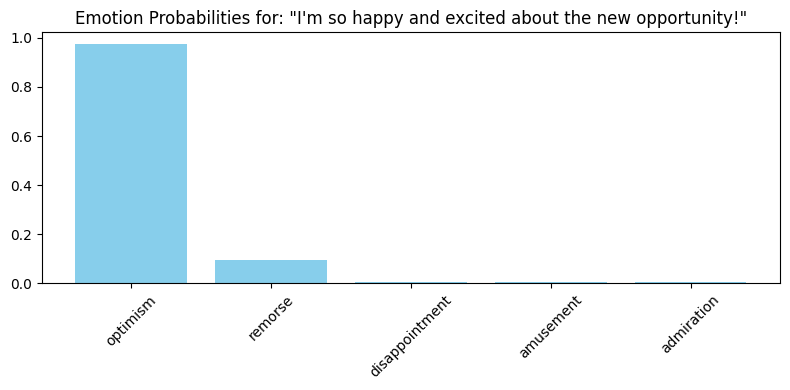


Text: This is absolutely terrible and I feel hopeless.
Probabilities (top 5):
pride: 0.91
nervousness: 0.25
love: 0.06
surprise: 0.02
curiosity: 0.01
Predicted Emotions (threshold 0.2): ['nervousness', 'pride']


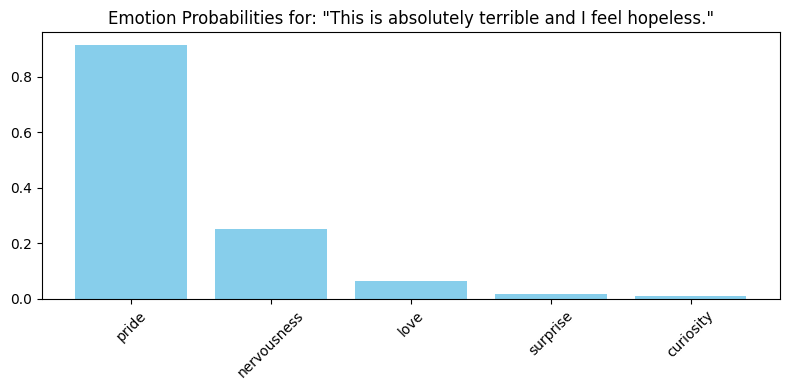


Text: I don't know how to feel, it's all so confusing.
Probabilities (top 5):
fear: 0.99
disappointment: 0.01
love: 0.01
joy: 0.01
disgust: 0.01
Predicted Emotions (threshold 0.2): ['fear']


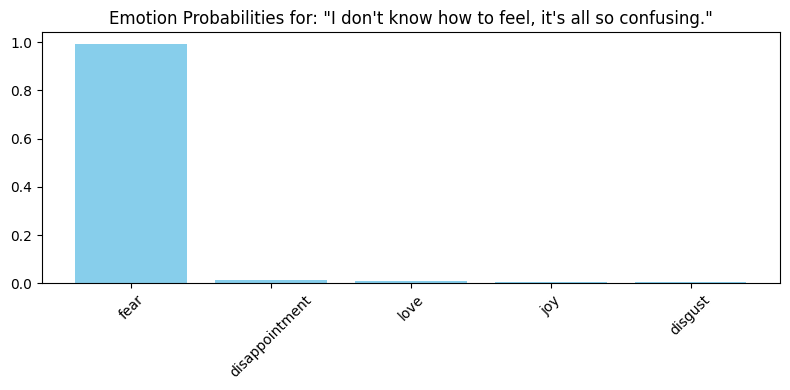

In [43]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import matplotlib.pyplot as plt

# Sample texts
sample_texts = [
    "I'm so happy and excited about the new opportunity!",
    "This is absolutely terrible and I feel hopeless.",
    "I don't know how to feel, it's all so confusing."
]

# Load pre-trained GoEmotions model
model_name = "monologg/bert-base-cased-goemotions-original"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Label list (43 emotions + neutral for this model)
label_list = model.config.id2label.values() if hasattr(model.config, 'id2label') else list(range(model.config.num_labels))

# Tokenize
inputs = tokenizer(sample_texts, return_tensors="pt", padding=True, truncation=True)

# Predict
model.eval()
with torch.no_grad():
    outputs = model(**inputs)
    probs = torch.sigmoid(outputs.logits)

# Threshold for emotion detection
threshold = 0.2
preds = (probs >= threshold).int().numpy()

# Show predictions and probabilities
for i, (text, prob, pred) in enumerate(zip(sample_texts, probs.numpy(), preds)):
    print(f"\nText: {text}")

    # Print emotions with prob > 0.1
    print("Probabilities (top 5):")
    top_indices = prob.argsort()[-5:][::-1]
    for idx in top_indices:
        print(f"{list(label_list)[idx]}: {prob[idx]:.2f}")

    # Predicted emotions
    emotions = [list(label_list)[i] for i, val in enumerate(pred) if val == 1]
    print(f"Predicted Emotions (threshold {threshold}): {emotions}")

    # Optional: Plot emotion probabilities
    plt.figure(figsize=(8, 4))
    plt.bar([list(label_list)[i] for i in top_indices], [prob[i] for i in top_indices], color='skyblue')
    plt.title(f"Emotion Probabilities for: \"{text}\"")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
